# GNN Exploration

In [1]:
import os
import sys

parent = os.path.dirname(os.path.dirname(os.getcwd()))
if parent not in sys.path:
    sys.path.append(parent)
print(parent)

d:\Documents\git\XAI-Cancer-Diagnosis


# ACQUIRE DATESET
The purpose of the below code is to construct the dataset for GNN. This involves taking BACH and: 1) Doing cell segmentation, 2) Construct the graphs. 
THe First step is very time consuming so the code below does the computation and saves it. THen we can do 2 seperatly at run time and have hyper parameters that vary how the graphs are constructed

In [2]:
# HOVERNET MODEL

from src.model.architectures.graph_construction.hover_net import HoVerNet
chkpt = "HoVerNet_MD-3.2.ckpt"
chkpt_path = os.path.join(parent,"experiments","checkpoints",chkpt)

cell_seg_model = HoVerNet.load_from_checkpoint(chkpt_path, RESNET_SIZE=50,START_LR=0)

from src.datasets.BACH import BACH
src_folder = os.path.join(parent,"data","processed","BACH_TRAIN")
prc_folder = os.path.join(parent,"data","processed","BACH_TRAIN","INSTANCE_SEGMENTATION")

In [3]:
# DATA

from tqdm import tqdm
from PIL import Image
from src.transforms.graph_construction.hovernet_post_processing import *
from torchvision.transforms import Compose, ToTensor, Normalize
from torchvision.transforms.functional import adjust_sharpness
from src.utilities.img_utilities import tensor_to_numpy
import matplotlib.pyplot as plt


def generate_instance_masks(): # USE OF SHARPEN IS IMPORTANT TO CREATE MORE DISTINCTIVE CELLS
    """Takes all the BACH images and performs instance segmentation so that the graph constructors may be called later.
    """
    bach = BACH(src_folder,ids=list(range(1,401)))

    img_transform = Compose(
                [ToTensor()]) #(lambda x: adjust_sharpness(x,20))])
    normalizer = Normalize((0.6441, 0.4474, 0.6039), (0.1892, 0.1922, 0.1535))
    for path in tqdm(bach.original_image_paths, desc="Creating Instance Segmentation from BACH"):
        img = Image.open(path)
        
        orig_img = img_transform(img)
        img = normalizer(orig_img.clone())
        
        ins_pred = instance_mask_prediction_hovernet(cell_seg_model, img, tile_size=128, pre_normalized=True)
        
        img = cut_img_from_tile(img, tile_size=128)
        orig_img = cut_img_from_tile(orig_img, tile_size=128)
        
        assert img.shape[1:] == ins_pred.shape[:]
        
        data = {"image": img, "instance_mask": ins_pred,"original_image": orig_img}
        file_name = os.path.basename(path)[:-4] + ".pt"
        proc_path = os.path.join(bach.instance_segmentation_dir, file_name)
        plt.imsave(os.path.join(bach.instance_segmentation_dir,"VIZUALISED", file_name[:-3] + ".png"),tensor_to_numpy(ins_pred.squeeze()),cmap="nipy_spectral")
        print(ins_pred.max())
        
        torch.save(data, proc_path)

In [4]:
generate_instance_masks()

Creating Instance Segmentation from BACH:   0%|          | 0/400 [00:00<?, ?it/s]

tensor(396, dtype=torch.int32)


Creating Instance Segmentation from BACH:   0%|          | 1/400 [01:10<7:48:19, 70.43s/it]

tensor(1565, dtype=torch.int32)


Creating Instance Segmentation from BACH:   0%|          | 2/400 [01:54<6:04:49, 55.00s/it]

tensor(987, dtype=torch.int32)


Creating Instance Segmentation from BACH:   1%|          | 3/400 [02:38<5:29:38, 49.82s/it]

tensor(1034, dtype=torch.int32)


Creating Instance Segmentation from BACH:   1%|          | 4/400 [03:21<5:12:19, 47.32s/it]

tensor(1199, dtype=torch.int32)


Creating Instance Segmentation from BACH:   1%|▏         | 5/400 [04:05<5:02:45, 45.99s/it]

tensor(721, dtype=torch.int32)


Creating Instance Segmentation from BACH:   2%|▏         | 6/400 [04:48<4:56:29, 45.15s/it]

tensor(940, dtype=torch.int32)


Creating Instance Segmentation from BACH:   2%|▏         | 7/400 [05:32<4:52:09, 44.60s/it]

tensor(1238, dtype=torch.int32)


Creating Instance Segmentation from BACH:   2%|▏         | 8/400 [06:15<4:49:03, 44.24s/it]

tensor(651, dtype=torch.int32)


Creating Instance Segmentation from BACH:   2%|▏         | 9/400 [06:59<4:46:41, 43.99s/it]

tensor(616, dtype=torch.int32)


Creating Instance Segmentation from BACH:   2%|▎         | 10/400 [07:42<4:44:54, 43.83s/it]

tensor(502, dtype=torch.int32)


Creating Instance Segmentation from BACH:   3%|▎         | 11/400 [08:26<4:43:23, 43.71s/it]

tensor(830, dtype=torch.int32)


Creating Instance Segmentation from BACH:   3%|▎         | 12/400 [09:09<4:42:32, 43.69s/it]

tensor(999, dtype=torch.int32)


Creating Instance Segmentation from BACH:   3%|▎         | 13/400 [09:53<4:41:33, 43.65s/it]

tensor(479, dtype=torch.int32)


Creating Instance Segmentation from BACH:   4%|▎         | 14/400 [10:37<4:40:44, 43.64s/it]

tensor(495, dtype=torch.int32)


Creating Instance Segmentation from BACH:   4%|▍         | 15/400 [11:20<4:39:42, 43.59s/it]

tensor(622, dtype=torch.int32)


Creating Instance Segmentation from BACH:   4%|▍         | 16/400 [12:04<4:38:50, 43.57s/it]

tensor(686, dtype=torch.int32)


Creating Instance Segmentation from BACH:   4%|▍         | 17/400 [12:47<4:38:14, 43.59s/it]

tensor(887, dtype=torch.int32)


Creating Instance Segmentation from BACH:   4%|▍         | 18/400 [13:31<4:37:34, 43.60s/it]

tensor(1006, dtype=torch.int32)


Creating Instance Segmentation from BACH:   5%|▍         | 19/400 [14:15<4:37:20, 43.68s/it]

tensor(1684, dtype=torch.int32)


Creating Instance Segmentation from BACH:   5%|▌         | 20/400 [14:59<4:37:00, 43.74s/it]

tensor(966, dtype=torch.int32)


Creating Instance Segmentation from BACH:   5%|▌         | 21/400 [15:42<4:35:51, 43.67s/it]

tensor(977, dtype=torch.int32)


Creating Instance Segmentation from BACH:   6%|▌         | 22/400 [16:26<4:35:10, 43.68s/it]

tensor(810, dtype=torch.int32)


Creating Instance Segmentation from BACH:   6%|▌         | 23/400 [17:09<4:34:11, 43.64s/it]

tensor(1163, dtype=torch.int32)


Creating Instance Segmentation from BACH:   6%|▌         | 24/400 [17:53<4:33:32, 43.65s/it]

tensor(1787, dtype=torch.int32)


Creating Instance Segmentation from BACH:   6%|▋         | 25/400 [18:37<4:32:56, 43.67s/it]

tensor(1312, dtype=torch.int32)


Creating Instance Segmentation from BACH:   6%|▋         | 26/400 [19:21<4:32:30, 43.72s/it]

tensor(1436, dtype=torch.int32)


Creating Instance Segmentation from BACH:   7%|▋         | 27/400 [20:04<4:31:45, 43.72s/it]

tensor(873, dtype=torch.int32)


Creating Instance Segmentation from BACH:   7%|▋         | 28/400 [20:48<4:30:46, 43.67s/it]

tensor(1203, dtype=torch.int32)


Creating Instance Segmentation from BACH:   7%|▋         | 29/400 [21:31<4:29:36, 43.60s/it]

tensor(167, dtype=torch.int32)


Creating Instance Segmentation from BACH:   8%|▊         | 30/400 [22:15<4:28:25, 43.53s/it]

tensor(369, dtype=torch.int32)


Creating Instance Segmentation from BACH:   8%|▊         | 31/400 [22:58<4:27:57, 43.57s/it]

tensor(1593, dtype=torch.int32)


Creating Instance Segmentation from BACH:   8%|▊         | 32/400 [23:42<4:27:32, 43.62s/it]

tensor(906, dtype=torch.int32)


Creating Instance Segmentation from BACH:   8%|▊         | 33/400 [24:26<4:26:40, 43.60s/it]

tensor(609, dtype=torch.int32)


Creating Instance Segmentation from BACH:   8%|▊         | 34/400 [25:09<4:25:54, 43.59s/it]

tensor(1927, dtype=torch.int32)


Creating Instance Segmentation from BACH:   9%|▉         | 35/400 [25:53<4:25:36, 43.66s/it]

tensor(1366, dtype=torch.int32)


Creating Instance Segmentation from BACH:   9%|▉         | 36/400 [26:37<4:25:12, 43.72s/it]

tensor(1608, dtype=torch.int32)


Creating Instance Segmentation from BACH:   9%|▉         | 37/400 [27:21<4:24:38, 43.74s/it]

tensor(1595, dtype=torch.int32)


Creating Instance Segmentation from BACH:  10%|▉         | 38/400 [28:04<4:23:51, 43.73s/it]

tensor(2393, dtype=torch.int32)


Creating Instance Segmentation from BACH:  10%|▉         | 39/400 [28:48<4:23:17, 43.76s/it]

tensor(2249, dtype=torch.int32)


Creating Instance Segmentation from BACH:  10%|█         | 40/400 [29:32<4:22:56, 43.82s/it]

tensor(1518, dtype=torch.int32)


Creating Instance Segmentation from BACH:  10%|█         | 41/400 [30:16<4:22:00, 43.79s/it]

tensor(1175, dtype=torch.int32)


Creating Instance Segmentation from BACH:  10%|█         | 42/400 [30:59<4:20:35, 43.68s/it]

tensor(1466, dtype=torch.int32)


Creating Instance Segmentation from BACH:  11%|█         | 43/400 [31:43<4:19:33, 43.62s/it]

tensor(1266, dtype=torch.int32)


Creating Instance Segmentation from BACH:  11%|█         | 44/400 [32:26<4:18:27, 43.56s/it]

tensor(296, dtype=torch.int32)


Creating Instance Segmentation from BACH:  11%|█▏        | 45/400 [33:10<4:17:25, 43.51s/it]

tensor(1056, dtype=torch.int32)


Creating Instance Segmentation from BACH:  12%|█▏        | 46/400 [33:53<4:16:57, 43.55s/it]

tensor(814, dtype=torch.int32)


Creating Instance Segmentation from BACH:  12%|█▏        | 47/400 [34:37<4:16:03, 43.52s/it]

tensor(316, dtype=torch.int32)


Creating Instance Segmentation from BACH:  12%|█▏        | 48/400 [35:20<4:15:04, 43.48s/it]

tensor(1483, dtype=torch.int32)


Creating Instance Segmentation from BACH:  12%|█▏        | 49/400 [36:04<4:14:23, 43.49s/it]

tensor(665, dtype=torch.int32)


Creating Instance Segmentation from BACH:  12%|█▎        | 50/400 [36:47<4:13:53, 43.52s/it]

tensor(402, dtype=torch.int32)


Creating Instance Segmentation from BACH:  13%|█▎        | 51/400 [37:31<4:13:04, 43.51s/it]

tensor(343, dtype=torch.int32)


Creating Instance Segmentation from BACH:  13%|█▎        | 52/400 [38:14<4:12:03, 43.46s/it]

tensor(990, dtype=torch.int32)


Creating Instance Segmentation from BACH:  13%|█▎        | 53/400 [38:58<4:11:38, 43.51s/it]

tensor(409, dtype=torch.int32)


Creating Instance Segmentation from BACH:  14%|█▎        | 54/400 [39:41<4:10:38, 43.46s/it]

tensor(1735, dtype=torch.int32)


Creating Instance Segmentation from BACH:  14%|█▍        | 55/400 [40:25<4:10:12, 43.51s/it]

tensor(1352, dtype=torch.int32)


Creating Instance Segmentation from BACH:  14%|█▍        | 56/400 [41:08<4:09:37, 43.54s/it]

tensor(2801, dtype=torch.int32)


Creating Instance Segmentation from BACH:  14%|█▍        | 57/400 [41:52<4:09:09, 43.59s/it]

tensor(1030, dtype=torch.int32)


Creating Instance Segmentation from BACH:  14%|█▍        | 58/400 [42:35<4:08:15, 43.55s/it]

tensor(729, dtype=torch.int32)


Creating Instance Segmentation from BACH:  15%|█▍        | 59/400 [43:19<4:07:34, 43.56s/it]

tensor(1612, dtype=torch.int32)


Creating Instance Segmentation from BACH:  15%|█▌        | 60/400 [44:03<4:07:11, 43.62s/it]

tensor(1004, dtype=torch.int32)


Creating Instance Segmentation from BACH:  15%|█▌        | 61/400 [44:46<4:06:10, 43.57s/it]

tensor(1994, dtype=torch.int32)


Creating Instance Segmentation from BACH:  16%|█▌        | 62/400 [45:30<4:05:49, 43.64s/it]

tensor(1318, dtype=torch.int32)


Creating Instance Segmentation from BACH:  16%|█▌        | 63/400 [46:14<4:05:10, 43.65s/it]

tensor(1996, dtype=torch.int32)


Creating Instance Segmentation from BACH:  16%|█▌        | 64/400 [46:57<4:04:13, 43.61s/it]

tensor(745, dtype=torch.int32)


Creating Instance Segmentation from BACH:  16%|█▋        | 65/400 [47:41<4:03:18, 43.58s/it]

tensor(380, dtype=torch.int32)


Creating Instance Segmentation from BACH:  16%|█▋        | 66/400 [48:24<4:02:48, 43.62s/it]

tensor(180, dtype=torch.int32)


Creating Instance Segmentation from BACH:  17%|█▋        | 67/400 [49:08<4:01:49, 43.57s/it]

tensor(1040, dtype=torch.int32)


Creating Instance Segmentation from BACH:  17%|█▋        | 68/400 [49:51<4:01:12, 43.59s/it]

tensor(1801, dtype=torch.int32)


Creating Instance Segmentation from BACH:  17%|█▋        | 69/400 [50:35<4:00:57, 43.68s/it]

tensor(1534, dtype=torch.int32)


Creating Instance Segmentation from BACH:  18%|█▊        | 70/400 [51:19<4:00:31, 43.73s/it]

tensor(1648, dtype=torch.int32)


Creating Instance Segmentation from BACH:  18%|█▊        | 71/400 [52:03<3:59:44, 43.72s/it]

tensor(1022, dtype=torch.int32)


Creating Instance Segmentation from BACH:  18%|█▊        | 72/400 [52:46<3:58:40, 43.66s/it]

tensor(1098, dtype=torch.int32)


Creating Instance Segmentation from BACH:  18%|█▊        | 73/400 [53:30<3:57:54, 43.65s/it]

tensor(1357, dtype=torch.int32)


Creating Instance Segmentation from BACH:  18%|█▊        | 74/400 [54:14<3:57:04, 43.63s/it]

tensor(1459, dtype=torch.int32)


Creating Instance Segmentation from BACH:  19%|█▉        | 75/400 [54:57<3:56:29, 43.66s/it]

tensor(1024, dtype=torch.int32)


Creating Instance Segmentation from BACH:  19%|█▉        | 76/400 [55:41<3:55:31, 43.62s/it]

tensor(496, dtype=torch.int32)


Creating Instance Segmentation from BACH:  19%|█▉        | 77/400 [56:24<3:54:31, 43.57s/it]

tensor(2526, dtype=torch.int32)


Creating Instance Segmentation from BACH:  20%|█▉        | 78/400 [57:08<3:53:54, 43.59s/it]

tensor(965, dtype=torch.int32)


Creating Instance Segmentation from BACH:  20%|█▉        | 79/400 [57:52<3:53:12, 43.59s/it]

tensor(1168, dtype=torch.int32)


Creating Instance Segmentation from BACH:  20%|██        | 80/400 [58:35<3:52:36, 43.61s/it]

tensor(2098, dtype=torch.int32)


Creating Instance Segmentation from BACH:  20%|██        | 81/400 [59:19<3:52:13, 43.68s/it]

tensor(132, dtype=torch.int32)


Creating Instance Segmentation from BACH:  20%|██        | 82/400 [1:00:02<3:51:09, 43.61s/it]

tensor(384, dtype=torch.int32)


Creating Instance Segmentation from BACH:  21%|██        | 83/400 [1:00:46<3:50:18, 43.59s/it]

tensor(2260, dtype=torch.int32)


Creating Instance Segmentation from BACH:  21%|██        | 84/400 [1:01:30<3:49:49, 43.64s/it]

tensor(2489, dtype=torch.int32)


Creating Instance Segmentation from BACH:  21%|██▏       | 85/400 [1:02:14<3:49:28, 43.71s/it]

tensor(1392, dtype=torch.int32)


Creating Instance Segmentation from BACH:  22%|██▏       | 86/400 [1:02:57<3:48:34, 43.68s/it]

tensor(2359, dtype=torch.int32)


Creating Instance Segmentation from BACH:  22%|██▏       | 87/400 [1:03:41<3:47:55, 43.69s/it]

tensor(1918, dtype=torch.int32)


Creating Instance Segmentation from BACH:  22%|██▏       | 88/400 [1:04:25<3:46:59, 43.65s/it]

tensor(865, dtype=torch.int32)


Creating Instance Segmentation from BACH:  22%|██▏       | 89/400 [1:05:08<3:46:05, 43.62s/it]

tensor(1566, dtype=torch.int32)


Creating Instance Segmentation from BACH:  22%|██▎       | 90/400 [1:05:52<3:45:55, 43.73s/it]

tensor(464, dtype=torch.int32)


Creating Instance Segmentation from BACH:  23%|██▎       | 91/400 [1:06:35<3:44:36, 43.61s/it]

tensor(801, dtype=torch.int32)


Creating Instance Segmentation from BACH:  23%|██▎       | 92/400 [1:07:19<3:43:50, 43.60s/it]

tensor(2081, dtype=torch.int32)


Creating Instance Segmentation from BACH:  23%|██▎       | 93/400 [1:08:03<3:43:15, 43.63s/it]

tensor(1393, dtype=torch.int32)


Creating Instance Segmentation from BACH:  24%|██▎       | 94/400 [1:08:46<3:42:36, 43.65s/it]

tensor(1216, dtype=torch.int32)


Creating Instance Segmentation from BACH:  24%|██▍       | 95/400 [1:09:30<3:42:07, 43.70s/it]

tensor(714, dtype=torch.int32)


Creating Instance Segmentation from BACH:  24%|██▍       | 96/400 [1:10:14<3:40:57, 43.61s/it]

tensor(1476, dtype=torch.int32)


Creating Instance Segmentation from BACH:  24%|██▍       | 97/400 [1:10:57<3:40:20, 43.63s/it]

tensor(1063, dtype=torch.int32)


Creating Instance Segmentation from BACH:  24%|██▍       | 98/400 [1:11:41<3:39:36, 43.63s/it]

tensor(1255, dtype=torch.int32)


Creating Instance Segmentation from BACH:  25%|██▍       | 99/400 [1:12:24<3:38:34, 43.57s/it]

tensor(2917, dtype=torch.int32)


Creating Instance Segmentation from BACH:  25%|██▌       | 100/400 [1:13:08<3:38:30, 43.70s/it]

tensor(777, dtype=torch.int32)


Creating Instance Segmentation from BACH:  25%|██▌       | 101/400 [1:13:52<3:37:37, 43.67s/it]

tensor(397, dtype=torch.int32)


Creating Instance Segmentation from BACH:  26%|██▌       | 102/400 [1:14:35<3:36:38, 43.62s/it]

tensor(593, dtype=torch.int32)


Creating Instance Segmentation from BACH:  26%|██▌       | 103/400 [1:15:19<3:35:48, 43.60s/it]

tensor(952, dtype=torch.int32)


Creating Instance Segmentation from BACH:  26%|██▌       | 104/400 [1:16:03<3:35:02, 43.59s/it]

tensor(1281, dtype=torch.int32)


Creating Instance Segmentation from BACH:  26%|██▋       | 105/400 [1:16:46<3:34:25, 43.61s/it]

tensor(1049, dtype=torch.int32)


Creating Instance Segmentation from BACH:  26%|██▋       | 106/400 [1:17:30<3:33:53, 43.65s/it]

tensor(1103, dtype=torch.int32)


Creating Instance Segmentation from BACH:  27%|██▋       | 107/400 [1:18:14<3:33:13, 43.66s/it]

tensor(935, dtype=torch.int32)


Creating Instance Segmentation from BACH:  27%|██▋       | 108/400 [1:18:57<3:32:12, 43.60s/it]

tensor(793, dtype=torch.int32)


Creating Instance Segmentation from BACH:  27%|██▋       | 109/400 [1:19:41<3:31:21, 43.58s/it]

tensor(1207, dtype=torch.int32)


Creating Instance Segmentation from BACH:  28%|██▊       | 110/400 [1:20:24<3:30:33, 43.56s/it]

tensor(392, dtype=torch.int32)


Creating Instance Segmentation from BACH:  28%|██▊       | 111/400 [1:21:08<3:29:48, 43.56s/it]

tensor(195, dtype=torch.int32)


Creating Instance Segmentation from BACH:  28%|██▊       | 112/400 [1:21:51<3:28:46, 43.49s/it]

tensor(1030, dtype=torch.int32)


Creating Instance Segmentation from BACH:  28%|██▊       | 113/400 [1:22:35<3:28:10, 43.52s/it]

tensor(638, dtype=torch.int32)


Creating Instance Segmentation from BACH:  28%|██▊       | 114/400 [1:23:18<3:27:18, 43.49s/it]

tensor(224, dtype=torch.int32)


Creating Instance Segmentation from BACH:  29%|██▉       | 115/400 [1:24:01<3:26:24, 43.45s/it]

tensor(255, dtype=torch.int32)


Creating Instance Segmentation from BACH:  29%|██▉       | 116/400 [1:24:45<3:25:52, 43.49s/it]

tensor(893, dtype=torch.int32)


Creating Instance Segmentation from BACH:  29%|██▉       | 117/400 [1:25:29<3:25:13, 43.51s/it]

tensor(924, dtype=torch.int32)


Creating Instance Segmentation from BACH:  30%|██▉       | 118/400 [1:26:12<3:24:36, 43.54s/it]

tensor(729, dtype=torch.int32)


Creating Instance Segmentation from BACH:  30%|██▉       | 119/400 [1:26:56<3:23:59, 43.56s/it]

tensor(595, dtype=torch.int32)


Creating Instance Segmentation from BACH:  30%|███       | 120/400 [1:27:39<3:23:13, 43.55s/it]

tensor(1129, dtype=torch.int32)


Creating Instance Segmentation from BACH:  30%|███       | 121/400 [1:28:23<3:22:28, 43.54s/it]

tensor(1740, dtype=torch.int32)


Creating Instance Segmentation from BACH:  30%|███       | 122/400 [1:29:07<3:22:08, 43.63s/it]

tensor(910, dtype=torch.int32)


Creating Instance Segmentation from BACH:  31%|███       | 123/400 [1:29:50<3:21:16, 43.60s/it]

tensor(1361, dtype=torch.int32)


Creating Instance Segmentation from BACH:  31%|███       | 124/400 [1:30:34<3:20:37, 43.61s/it]

tensor(845, dtype=torch.int32)


Creating Instance Segmentation from BACH:  31%|███▏      | 125/400 [1:31:17<3:19:56, 43.62s/it]

tensor(775, dtype=torch.int32)


Creating Instance Segmentation from BACH:  32%|███▏      | 126/400 [1:32:01<3:19:06, 43.60s/it]

tensor(550, dtype=torch.int32)


Creating Instance Segmentation from BACH:  32%|███▏      | 127/400 [1:32:45<3:18:20, 43.59s/it]

tensor(642, dtype=torch.int32)


Creating Instance Segmentation from BACH:  32%|███▏      | 128/400 [1:33:28<3:17:40, 43.60s/it]

tensor(617, dtype=torch.int32)


Creating Instance Segmentation from BACH:  32%|███▏      | 129/400 [1:34:12<3:17:08, 43.65s/it]

tensor(890, dtype=torch.int32)


Creating Instance Segmentation from BACH:  32%|███▎      | 130/400 [1:34:56<3:16:23, 43.64s/it]

tensor(1387, dtype=torch.int32)


Creating Instance Segmentation from BACH:  33%|███▎      | 131/400 [1:35:39<3:15:41, 43.65s/it]

tensor(906, dtype=torch.int32)


Creating Instance Segmentation from BACH:  33%|███▎      | 132/400 [1:36:23<3:15:07, 43.68s/it]

tensor(819, dtype=torch.int32)


Creating Instance Segmentation from BACH:  33%|███▎      | 133/400 [1:37:07<3:14:32, 43.72s/it]

tensor(323, dtype=torch.int32)


Creating Instance Segmentation from BACH:  34%|███▎      | 134/400 [1:37:50<3:13:25, 43.63s/it]

tensor(878, dtype=torch.int32)


Creating Instance Segmentation from BACH:  34%|███▍      | 135/400 [1:38:34<3:12:30, 43.59s/it]

tensor(259, dtype=torch.int32)


Creating Instance Segmentation from BACH:  34%|███▍      | 136/400 [1:39:17<3:11:35, 43.54s/it]

tensor(859, dtype=torch.int32)


Creating Instance Segmentation from BACH:  34%|███▍      | 137/400 [1:40:01<3:10:45, 43.52s/it]

tensor(1518, dtype=torch.int32)


Creating Instance Segmentation from BACH:  34%|███▍      | 138/400 [1:40:44<3:10:20, 43.59s/it]

tensor(2212, dtype=torch.int32)


Creating Instance Segmentation from BACH:  35%|███▍      | 139/400 [1:41:28<3:09:41, 43.61s/it]

tensor(1172, dtype=torch.int32)


Creating Instance Segmentation from BACH:  35%|███▌      | 140/400 [1:42:12<3:08:47, 43.57s/it]

tensor(1686, dtype=torch.int32)


Creating Instance Segmentation from BACH:  35%|███▌      | 141/400 [1:42:55<3:08:06, 43.58s/it]

tensor(2334, dtype=torch.int32)


Creating Instance Segmentation from BACH:  36%|███▌      | 142/400 [1:43:39<3:07:35, 43.63s/it]

tensor(2532, dtype=torch.int32)


Creating Instance Segmentation from BACH:  36%|███▌      | 143/400 [1:44:23<3:07:02, 43.67s/it]

tensor(1813, dtype=torch.int32)


Creating Instance Segmentation from BACH:  36%|███▌      | 144/400 [1:45:06<3:06:25, 43.69s/it]

tensor(1533, dtype=torch.int32)


Creating Instance Segmentation from BACH:  36%|███▋      | 145/400 [1:45:50<3:05:32, 43.66s/it]

tensor(1549, dtype=torch.int32)


Creating Instance Segmentation from BACH:  36%|███▋      | 146/400 [1:46:34<3:04:43, 43.64s/it]

tensor(1442, dtype=torch.int32)


Creating Instance Segmentation from BACH:  37%|███▋      | 147/400 [1:47:17<3:03:48, 43.59s/it]

tensor(1717, dtype=torch.int32)


Creating Instance Segmentation from BACH:  37%|███▋      | 148/400 [1:48:01<3:03:11, 43.62s/it]

tensor(2094, dtype=torch.int32)


Creating Instance Segmentation from BACH:  37%|███▋      | 149/400 [1:48:45<3:02:42, 43.68s/it]

tensor(1997, dtype=torch.int32)


Creating Instance Segmentation from BACH:  38%|███▊      | 150/400 [1:49:28<3:01:57, 43.67s/it]

tensor(1438, dtype=torch.int32)


Creating Instance Segmentation from BACH:  38%|███▊      | 151/400 [1:50:12<3:01:00, 43.62s/it]

tensor(2655, dtype=torch.int32)


Creating Instance Segmentation from BACH:  38%|███▊      | 152/400 [1:50:56<3:00:34, 43.69s/it]

tensor(2486, dtype=torch.int32)


Creating Instance Segmentation from BACH:  38%|███▊      | 153/400 [1:51:39<2:59:56, 43.71s/it]

tensor(1512, dtype=torch.int32)


Creating Instance Segmentation from BACH:  38%|███▊      | 154/400 [1:52:23<2:59:11, 43.70s/it]

tensor(2332, dtype=torch.int32)


Creating Instance Segmentation from BACH:  39%|███▉      | 155/400 [1:53:07<2:58:38, 43.75s/it]

tensor(2174, dtype=torch.int32)


Creating Instance Segmentation from BACH:  39%|███▉      | 156/400 [1:53:51<2:57:54, 43.75s/it]

tensor(951, dtype=torch.int32)


Creating Instance Segmentation from BACH:  39%|███▉      | 157/400 [1:54:34<2:56:52, 43.67s/it]

tensor(1810, dtype=torch.int32)


Creating Instance Segmentation from BACH:  40%|███▉      | 158/400 [1:55:18<2:56:22, 43.73s/it]

tensor(1483, dtype=torch.int32)


Creating Instance Segmentation from BACH:  40%|███▉      | 159/400 [1:56:02<2:55:27, 43.68s/it]

tensor(1810, dtype=torch.int32)


Creating Instance Segmentation from BACH:  40%|████      | 160/400 [1:56:45<2:54:44, 43.68s/it]

tensor(1534, dtype=torch.int32)


Creating Instance Segmentation from BACH:  40%|████      | 161/400 [1:57:29<2:54:01, 43.69s/it]

tensor(1743, dtype=torch.int32)


Creating Instance Segmentation from BACH:  40%|████      | 162/400 [1:58:13<2:53:16, 43.68s/it]

tensor(1384, dtype=torch.int32)


Creating Instance Segmentation from BACH:  41%|████      | 163/400 [1:58:56<2:52:27, 43.66s/it]

tensor(928, dtype=torch.int32)


Creating Instance Segmentation from BACH:  41%|████      | 164/400 [1:59:40<2:51:33, 43.62s/it]

tensor(1165, dtype=torch.int32)


Creating Instance Segmentation from BACH:  41%|████▏     | 165/400 [2:00:23<2:50:45, 43.60s/it]

tensor(1876, dtype=torch.int32)


Creating Instance Segmentation from BACH:  42%|████▏     | 166/400 [2:01:07<2:50:02, 43.60s/it]

tensor(2699, dtype=torch.int32)


Creating Instance Segmentation from BACH:  42%|████▏     | 167/400 [2:01:51<2:49:55, 43.76s/it]

tensor(2035, dtype=torch.int32)


Creating Instance Segmentation from BACH:  42%|████▏     | 168/400 [2:02:35<2:49:13, 43.76s/it]

tensor(1369, dtype=torch.int32)


Creating Instance Segmentation from BACH:  42%|████▏     | 169/400 [2:03:18<2:48:18, 43.71s/it]

tensor(1413, dtype=torch.int32)


Creating Instance Segmentation from BACH:  42%|████▎     | 170/400 [2:04:02<2:47:32, 43.71s/it]

tensor(1285, dtype=torch.int32)


Creating Instance Segmentation from BACH:  43%|████▎     | 171/400 [2:04:46<2:46:33, 43.64s/it]

tensor(947, dtype=torch.int32)


Creating Instance Segmentation from BACH:  43%|████▎     | 172/400 [2:05:29<2:45:49, 43.64s/it]

tensor(498, dtype=torch.int32)


Creating Instance Segmentation from BACH:  43%|████▎     | 173/400 [2:06:13<2:44:53, 43.58s/it]

tensor(281, dtype=torch.int32)


Creating Instance Segmentation from BACH:  44%|████▎     | 174/400 [2:06:56<2:43:58, 43.53s/it]

tensor(2839, dtype=torch.int32)


Creating Instance Segmentation from BACH:  44%|████▍     | 175/400 [2:07:40<2:43:29, 43.60s/it]

tensor(2569, dtype=torch.int32)


Creating Instance Segmentation from BACH:  44%|████▍     | 176/400 [2:08:24<2:42:57, 43.65s/it]

tensor(1424, dtype=torch.int32)


Creating Instance Segmentation from BACH:  44%|████▍     | 177/400 [2:09:07<2:42:22, 43.69s/it]

tensor(1500, dtype=torch.int32)


Creating Instance Segmentation from BACH:  44%|████▍     | 178/400 [2:09:51<2:41:34, 43.67s/it]

tensor(1672, dtype=torch.int32)


Creating Instance Segmentation from BACH:  45%|████▍     | 179/400 [2:10:35<2:40:53, 43.68s/it]

tensor(2203, dtype=torch.int32)


Creating Instance Segmentation from BACH:  45%|████▌     | 180/400 [2:11:18<2:40:06, 43.66s/it]

tensor(932, dtype=torch.int32)


Creating Instance Segmentation from BACH:  45%|████▌     | 181/400 [2:12:02<2:39:20, 43.66s/it]

tensor(976, dtype=torch.int32)


Creating Instance Segmentation from BACH:  46%|████▌     | 182/400 [2:12:46<2:38:37, 43.66s/it]

tensor(801, dtype=torch.int32)


Creating Instance Segmentation from BACH:  46%|████▌     | 183/400 [2:13:29<2:37:36, 43.58s/it]

tensor(1057, dtype=torch.int32)


Creating Instance Segmentation from BACH:  46%|████▌     | 184/400 [2:14:13<2:36:54, 43.58s/it]

tensor(1348, dtype=torch.int32)


Creating Instance Segmentation from BACH:  46%|████▋     | 185/400 [2:14:56<2:36:12, 43.59s/it]

tensor(708, dtype=torch.int32)


Creating Instance Segmentation from BACH:  46%|████▋     | 186/400 [2:15:40<2:35:21, 43.56s/it]

tensor(3472, dtype=torch.int32)


Creating Instance Segmentation from BACH:  47%|████▋     | 187/400 [2:16:23<2:34:53, 43.63s/it]

tensor(2035, dtype=torch.int32)


Creating Instance Segmentation from BACH:  47%|████▋     | 188/400 [2:17:07<2:34:13, 43.65s/it]

tensor(1331, dtype=torch.int32)


Creating Instance Segmentation from BACH:  47%|████▋     | 189/400 [2:17:51<2:33:23, 43.62s/it]

tensor(778, dtype=torch.int32)


Creating Instance Segmentation from BACH:  48%|████▊     | 190/400 [2:18:34<2:32:38, 43.61s/it]

tensor(1423, dtype=torch.int32)


Creating Instance Segmentation from BACH:  48%|████▊     | 191/400 [2:19:18<2:32:14, 43.71s/it]

tensor(1879, dtype=torch.int32)


Creating Instance Segmentation from BACH:  48%|████▊     | 192/400 [2:20:02<2:31:30, 43.71s/it]

tensor(2749, dtype=torch.int32)


Creating Instance Segmentation from BACH:  48%|████▊     | 193/400 [2:20:46<2:30:57, 43.76s/it]

tensor(1941, dtype=torch.int32)


Creating Instance Segmentation from BACH:  48%|████▊     | 194/400 [2:21:29<2:30:04, 43.71s/it]

tensor(2905, dtype=torch.int32)


Creating Instance Segmentation from BACH:  49%|████▉     | 195/400 [2:22:14<2:29:48, 43.85s/it]

tensor(1218, dtype=torch.int32)


Creating Instance Segmentation from BACH:  49%|████▉     | 196/400 [2:22:57<2:28:51, 43.78s/it]

tensor(1803, dtype=torch.int32)


Creating Instance Segmentation from BACH:  49%|████▉     | 197/400 [2:23:41<2:27:58, 43.74s/it]

tensor(1151, dtype=torch.int32)


Creating Instance Segmentation from BACH:  50%|████▉     | 198/400 [2:24:25<2:27:23, 43.78s/it]

tensor(821, dtype=torch.int32)


Creating Instance Segmentation from BACH:  50%|████▉     | 199/400 [2:25:08<2:26:23, 43.70s/it]

tensor(1605, dtype=torch.int32)


Creating Instance Segmentation from BACH:  50%|█████     | 200/400 [2:25:52<2:25:30, 43.65s/it]

tensor(527, dtype=torch.int32)


Creating Instance Segmentation from BACH:  50%|█████     | 201/400 [2:26:35<2:24:42, 43.63s/it]

tensor(1999, dtype=torch.int32)


Creating Instance Segmentation from BACH:  50%|█████     | 202/400 [2:27:19<2:24:00, 43.64s/it]

tensor(1136, dtype=torch.int32)


Creating Instance Segmentation from BACH:  51%|█████     | 203/400 [2:28:03<2:23:17, 43.64s/it]

tensor(1942, dtype=torch.int32)


Creating Instance Segmentation from BACH:  51%|█████     | 204/400 [2:28:47<2:22:46, 43.71s/it]

tensor(1780, dtype=torch.int32)


Creating Instance Segmentation from BACH:  51%|█████▏    | 205/400 [2:29:31<2:22:21, 43.80s/it]

tensor(1183, dtype=torch.int32)


Creating Instance Segmentation from BACH:  52%|█████▏    | 206/400 [2:30:14<2:21:31, 43.77s/it]

tensor(1810, dtype=torch.int32)


Creating Instance Segmentation from BACH:  52%|█████▏    | 207/400 [2:30:58<2:20:46, 43.76s/it]

tensor(1626, dtype=torch.int32)


Creating Instance Segmentation from BACH:  52%|█████▏    | 208/400 [2:31:42<2:20:03, 43.77s/it]

tensor(1795, dtype=torch.int32)


Creating Instance Segmentation from BACH:  52%|█████▏    | 209/400 [2:32:25<2:19:13, 43.74s/it]

tensor(2007, dtype=torch.int32)


Creating Instance Segmentation from BACH:  52%|█████▎    | 210/400 [2:33:09<2:18:45, 43.82s/it]

tensor(1945, dtype=torch.int32)


Creating Instance Segmentation from BACH:  53%|█████▎    | 211/400 [2:33:53<2:18:06, 43.84s/it]

tensor(872, dtype=torch.int32)


Creating Instance Segmentation from BACH:  53%|█████▎    | 212/400 [2:34:37<2:17:06, 43.76s/it]

tensor(774, dtype=torch.int32)


Creating Instance Segmentation from BACH:  53%|█████▎    | 213/400 [2:35:20<2:16:09, 43.69s/it]

tensor(841, dtype=torch.int32)


Creating Instance Segmentation from BACH:  54%|█████▎    | 214/400 [2:36:04<2:15:16, 43.64s/it]

tensor(991, dtype=torch.int32)


Creating Instance Segmentation from BACH:  54%|█████▍    | 215/400 [2:36:48<2:14:38, 43.67s/it]

tensor(848, dtype=torch.int32)


Creating Instance Segmentation from BACH:  54%|█████▍    | 216/400 [2:37:31<2:13:44, 43.61s/it]

tensor(703, dtype=torch.int32)


Creating Instance Segmentation from BACH:  54%|█████▍    | 217/400 [2:38:15<2:13:20, 43.72s/it]

tensor(1203, dtype=torch.int32)


Creating Instance Segmentation from BACH:  55%|█████▍    | 218/400 [2:38:59<2:12:32, 43.69s/it]

tensor(443, dtype=torch.int32)


Creating Instance Segmentation from BACH:  55%|█████▍    | 219/400 [2:39:42<2:11:42, 43.66s/it]

tensor(556, dtype=torch.int32)


Creating Instance Segmentation from BACH:  55%|█████▌    | 220/400 [2:40:26<2:10:47, 43.60s/it]

tensor(470, dtype=torch.int32)


Creating Instance Segmentation from BACH:  55%|█████▌    | 221/400 [2:41:09<2:09:59, 43.57s/it]

tensor(967, dtype=torch.int32)


Creating Instance Segmentation from BACH:  56%|█████▌    | 222/400 [2:41:53<2:09:28, 43.64s/it]

tensor(891, dtype=torch.int32)


Creating Instance Segmentation from BACH:  56%|█████▌    | 223/400 [2:42:37<2:08:39, 43.61s/it]

tensor(944, dtype=torch.int32)


Creating Instance Segmentation from BACH:  56%|█████▌    | 224/400 [2:43:20<2:07:48, 43.57s/it]

tensor(1435, dtype=torch.int32)


Creating Instance Segmentation from BACH:  56%|█████▋    | 225/400 [2:44:04<2:07:09, 43.60s/it]

tensor(1034, dtype=torch.int32)


Creating Instance Segmentation from BACH:  56%|█████▋    | 226/400 [2:44:47<2:06:23, 43.58s/it]

tensor(1403, dtype=torch.int32)


Creating Instance Segmentation from BACH:  57%|█████▋    | 227/400 [2:45:31<2:05:45, 43.62s/it]

tensor(1213, dtype=torch.int32)


Creating Instance Segmentation from BACH:  57%|█████▋    | 228/400 [2:46:15<2:05:05, 43.64s/it]

tensor(279, dtype=torch.int32)


Creating Instance Segmentation from BACH:  57%|█████▋    | 229/400 [2:46:58<2:04:13, 43.59s/it]

tensor(633, dtype=torch.int32)


Creating Instance Segmentation from BACH:  57%|█████▊    | 230/400 [2:47:42<2:03:21, 43.54s/it]

tensor(1307, dtype=torch.int32)


Creating Instance Segmentation from BACH:  58%|█████▊    | 231/400 [2:48:25<2:02:42, 43.56s/it]

tensor(1053, dtype=torch.int32)


Creating Instance Segmentation from BACH:  58%|█████▊    | 232/400 [2:49:09<2:02:00, 43.58s/it]

tensor(1421, dtype=torch.int32)


Creating Instance Segmentation from BACH:  58%|█████▊    | 233/400 [2:49:53<2:01:21, 43.60s/it]

tensor(934, dtype=torch.int32)


Creating Instance Segmentation from BACH:  58%|█████▊    | 234/400 [2:50:36<2:00:38, 43.60s/it]

tensor(1034, dtype=torch.int32)


Creating Instance Segmentation from BACH:  59%|█████▉    | 235/400 [2:51:20<2:00:06, 43.68s/it]

tensor(657, dtype=torch.int32)


Creating Instance Segmentation from BACH:  59%|█████▉    | 236/400 [2:52:03<1:59:10, 43.60s/it]

tensor(358, dtype=torch.int32)


Creating Instance Segmentation from BACH:  59%|█████▉    | 237/400 [2:52:47<1:58:17, 43.54s/it]

tensor(867, dtype=torch.int32)


Creating Instance Segmentation from BACH:  60%|█████▉    | 238/400 [2:53:30<1:57:34, 43.55s/it]

tensor(1302, dtype=torch.int32)


Creating Instance Segmentation from BACH:  60%|█████▉    | 239/400 [2:54:14<1:57:07, 43.65s/it]

tensor(1643, dtype=torch.int32)


Creating Instance Segmentation from BACH:  60%|██████    | 240/400 [2:54:58<1:56:28, 43.68s/it]

tensor(1539, dtype=torch.int32)


Creating Instance Segmentation from BACH:  60%|██████    | 241/400 [2:55:42<1:55:47, 43.69s/it]

tensor(1818, dtype=torch.int32)


Creating Instance Segmentation from BACH:  60%|██████    | 242/400 [2:56:25<1:54:58, 43.66s/it]

tensor(3402, dtype=torch.int32)


Creating Instance Segmentation from BACH:  61%|██████    | 243/400 [2:57:09<1:54:30, 43.76s/it]

tensor(2240, dtype=torch.int32)


Creating Instance Segmentation from BACH:  61%|██████    | 244/400 [2:57:53<1:54:01, 43.85s/it]

tensor(2726, dtype=torch.int32)


Creating Instance Segmentation from BACH:  61%|██████▏   | 245/400 [2:58:37<1:53:20, 43.87s/it]

tensor(1469, dtype=torch.int32)


Creating Instance Segmentation from BACH:  62%|██████▏   | 246/400 [2:59:21<1:52:26, 43.81s/it]

tensor(3174, dtype=torch.int32)


Creating Instance Segmentation from BACH:  62%|██████▏   | 247/400 [3:00:05<1:52:01, 43.93s/it]

tensor(2156, dtype=torch.int32)


Creating Instance Segmentation from BACH:  62%|██████▏   | 248/400 [3:00:49<1:51:06, 43.86s/it]

tensor(908, dtype=torch.int32)


Creating Instance Segmentation from BACH:  62%|██████▏   | 249/400 [3:01:32<1:50:05, 43.75s/it]

tensor(2277, dtype=torch.int32)


Creating Instance Segmentation from BACH:  62%|██████▎   | 250/400 [3:02:16<1:49:24, 43.76s/it]

tensor(1821, dtype=torch.int32)


Creating Instance Segmentation from BACH:  63%|██████▎   | 251/400 [3:03:00<1:48:40, 43.76s/it]

tensor(2688, dtype=torch.int32)


Creating Instance Segmentation from BACH:  63%|██████▎   | 252/400 [3:03:44<1:47:57, 43.77s/it]

tensor(1669, dtype=torch.int32)


Creating Instance Segmentation from BACH:  63%|██████▎   | 253/400 [3:04:27<1:47:13, 43.76s/it]

tensor(1767, dtype=torch.int32)


Creating Instance Segmentation from BACH:  64%|██████▎   | 254/400 [3:05:11<1:46:22, 43.71s/it]

tensor(1630, dtype=torch.int32)


Creating Instance Segmentation from BACH:  64%|██████▍   | 255/400 [3:05:55<1:45:41, 43.73s/it]

tensor(1590, dtype=torch.int32)


Creating Instance Segmentation from BACH:  64%|██████▍   | 256/400 [3:06:38<1:44:49, 43.68s/it]

tensor(1524, dtype=torch.int32)


Creating Instance Segmentation from BACH:  64%|██████▍   | 257/400 [3:07:22<1:43:59, 43.63s/it]

tensor(2474, dtype=torch.int32)


Creating Instance Segmentation from BACH:  64%|██████▍   | 258/400 [3:08:06<1:43:18, 43.65s/it]

tensor(1896, dtype=torch.int32)


Creating Instance Segmentation from BACH:  65%|██████▍   | 259/400 [3:08:49<1:42:38, 43.67s/it]

tensor(1700, dtype=torch.int32)


Creating Instance Segmentation from BACH:  65%|██████▌   | 260/400 [3:09:33<1:41:58, 43.70s/it]

tensor(1110, dtype=torch.int32)


Creating Instance Segmentation from BACH:  65%|██████▌   | 261/400 [3:10:17<1:41:08, 43.66s/it]

tensor(1243, dtype=torch.int32)


Creating Instance Segmentation from BACH:  66%|██████▌   | 262/400 [3:11:00<1:40:22, 43.64s/it]

tensor(1752, dtype=torch.int32)


Creating Instance Segmentation from BACH:  66%|██████▌   | 263/400 [3:11:44<1:39:35, 43.61s/it]

tensor(1369, dtype=torch.int32)


Creating Instance Segmentation from BACH:  66%|██████▌   | 264/400 [3:12:27<1:38:46, 43.58s/it]

tensor(1969, dtype=torch.int32)


Creating Instance Segmentation from BACH:  66%|██████▋   | 265/400 [3:13:11<1:38:05, 43.60s/it]

tensor(552, dtype=torch.int32)


Creating Instance Segmentation from BACH:  66%|██████▋   | 266/400 [3:13:54<1:37:17, 43.56s/it]

tensor(2444, dtype=torch.int32)


Creating Instance Segmentation from BACH:  67%|██████▋   | 267/400 [3:14:38<1:36:42, 43.63s/it]

tensor(2095, dtype=torch.int32)


Creating Instance Segmentation from BACH:  67%|██████▋   | 268/400 [3:15:22<1:36:03, 43.66s/it]

tensor(2339, dtype=torch.int32)


Creating Instance Segmentation from BACH:  67%|██████▋   | 269/400 [3:16:06<1:35:19, 43.66s/it]

tensor(2573, dtype=torch.int32)


Creating Instance Segmentation from BACH:  68%|██████▊   | 270/400 [3:16:49<1:34:42, 43.71s/it]

tensor(1689, dtype=torch.int32)


Creating Instance Segmentation from BACH:  68%|██████▊   | 271/400 [3:17:33<1:33:58, 43.71s/it]

tensor(1008, dtype=torch.int32)


Creating Instance Segmentation from BACH:  68%|██████▊   | 272/400 [3:18:17<1:33:14, 43.71s/it]

tensor(1686, dtype=torch.int32)


Creating Instance Segmentation from BACH:  68%|██████▊   | 273/400 [3:19:00<1:32:27, 43.68s/it]

tensor(1635, dtype=torch.int32)


Creating Instance Segmentation from BACH:  68%|██████▊   | 274/400 [3:19:44<1:31:39, 43.65s/it]

tensor(2713, dtype=torch.int32)


Creating Instance Segmentation from BACH:  69%|██████▉   | 275/400 [3:20:28<1:31:02, 43.70s/it]

tensor(2465, dtype=torch.int32)


Creating Instance Segmentation from BACH:  69%|██████▉   | 276/400 [3:21:12<1:30:19, 43.70s/it]

tensor(1394, dtype=torch.int32)


Creating Instance Segmentation from BACH:  69%|██████▉   | 277/400 [3:21:55<1:29:30, 43.66s/it]

tensor(2138, dtype=torch.int32)


Creating Instance Segmentation from BACH:  70%|██████▉   | 278/400 [3:22:39<1:28:55, 43.73s/it]

tensor(1733, dtype=torch.int32)


Creating Instance Segmentation from BACH:  70%|██████▉   | 279/400 [3:23:23<1:28:07, 43.70s/it]

tensor(2001, dtype=torch.int32)


Creating Instance Segmentation from BACH:  70%|███████   | 280/400 [3:24:07<1:27:35, 43.79s/it]

tensor(1499, dtype=torch.int32)


Creating Instance Segmentation from BACH:  70%|███████   | 281/400 [3:24:51<1:26:55, 43.82s/it]

tensor(1059, dtype=torch.int32)


Creating Instance Segmentation from BACH:  70%|███████   | 282/400 [3:25:34<1:26:00, 43.74s/it]

tensor(2067, dtype=torch.int32)


Creating Instance Segmentation from BACH:  71%|███████   | 283/400 [3:26:18<1:25:19, 43.76s/it]

tensor(1812, dtype=torch.int32)


Creating Instance Segmentation from BACH:  71%|███████   | 284/400 [3:27:02<1:24:33, 43.74s/it]

tensor(1885, dtype=torch.int32)


Creating Instance Segmentation from BACH:  71%|███████▏  | 285/400 [3:27:45<1:23:49, 43.74s/it]

tensor(2755, dtype=torch.int32)


Creating Instance Segmentation from BACH:  72%|███████▏  | 286/400 [3:28:29<1:23:10, 43.78s/it]

tensor(1373, dtype=torch.int32)


Creating Instance Segmentation from BACH:  72%|███████▏  | 287/400 [3:29:13<1:22:22, 43.74s/it]

tensor(1621, dtype=torch.int32)


Creating Instance Segmentation from BACH:  72%|███████▏  | 288/400 [3:29:56<1:21:33, 43.69s/it]

tensor(1425, dtype=torch.int32)


Creating Instance Segmentation from BACH:  72%|███████▏  | 289/400 [3:30:40<1:20:47, 43.67s/it]

tensor(2227, dtype=torch.int32)


Creating Instance Segmentation from BACH:  72%|███████▎  | 290/400 [3:31:24<1:20:09, 43.72s/it]

tensor(2087, dtype=torch.int32)


Creating Instance Segmentation from BACH:  73%|███████▎  | 291/400 [3:32:08<1:19:25, 43.72s/it]

tensor(2211, dtype=torch.int32)


Creating Instance Segmentation from BACH:  73%|███████▎  | 292/400 [3:32:51<1:18:41, 43.71s/it]

tensor(2356, dtype=torch.int32)


Creating Instance Segmentation from BACH:  73%|███████▎  | 293/400 [3:33:35<1:18:00, 43.74s/it]

tensor(1813, dtype=torch.int32)


Creating Instance Segmentation from BACH:  74%|███████▎  | 294/400 [3:34:19<1:17:12, 43.71s/it]

tensor(1252, dtype=torch.int32)


Creating Instance Segmentation from BACH:  74%|███████▍  | 295/400 [3:35:02<1:16:26, 43.68s/it]

tensor(1151, dtype=torch.int32)


Creating Instance Segmentation from BACH:  74%|███████▍  | 296/400 [3:35:46<1:15:41, 43.67s/it]

tensor(1076, dtype=torch.int32)


Creating Instance Segmentation from BACH:  74%|███████▍  | 297/400 [3:36:30<1:14:58, 43.67s/it]

tensor(1378, dtype=torch.int32)


Creating Instance Segmentation from BACH:  74%|███████▍  | 298/400 [3:37:13<1:14:14, 43.67s/it]

tensor(2160, dtype=torch.int32)


Creating Instance Segmentation from BACH:  75%|███████▍  | 299/400 [3:37:57<1:13:27, 43.64s/it]

tensor(969, dtype=torch.int32)


Creating Instance Segmentation from BACH:  75%|███████▌  | 300/400 [3:38:40<1:12:37, 43.57s/it]

tensor(530, dtype=torch.int32)


Creating Instance Segmentation from BACH:  75%|███████▌  | 301/400 [3:39:24<1:11:50, 43.54s/it]

tensor(516, dtype=torch.int32)


Creating Instance Segmentation from BACH:  76%|███████▌  | 302/400 [3:40:07<1:11:00, 43.48s/it]

tensor(806, dtype=torch.int32)


Creating Instance Segmentation from BACH:  76%|███████▌  | 303/400 [3:40:51<1:10:28, 43.59s/it]

tensor(1892, dtype=torch.int32)


Creating Instance Segmentation from BACH:  76%|███████▌  | 304/400 [3:41:35<1:09:48, 43.63s/it]

tensor(784, dtype=torch.int32)


Creating Instance Segmentation from BACH:  76%|███████▋  | 305/400 [3:42:18<1:09:01, 43.59s/it]

tensor(1047, dtype=torch.int32)


Creating Instance Segmentation from BACH:  76%|███████▋  | 306/400 [3:43:02<1:08:13, 43.55s/it]

tensor(815, dtype=torch.int32)


Creating Instance Segmentation from BACH:  77%|███████▋  | 307/400 [3:43:45<1:07:29, 43.55s/it]

tensor(642, dtype=torch.int32)


Creating Instance Segmentation from BACH:  77%|███████▋  | 308/400 [3:44:29<1:06:43, 43.52s/it]

tensor(424, dtype=torch.int32)


Creating Instance Segmentation from BACH:  77%|███████▋  | 309/400 [3:45:12<1:05:56, 43.48s/it]

tensor(888, dtype=torch.int32)


Creating Instance Segmentation from BACH:  78%|███████▊  | 310/400 [3:45:55<1:05:12, 43.47s/it]

tensor(250, dtype=torch.int32)


Creating Instance Segmentation from BACH:  78%|███████▊  | 311/400 [3:46:39<1:04:29, 43.47s/it]

tensor(274, dtype=torch.int32)


Creating Instance Segmentation from BACH:  78%|███████▊  | 312/400 [3:47:22<1:03:44, 43.46s/it]

tensor(344, dtype=torch.int32)


Creating Instance Segmentation from BACH:  78%|███████▊  | 313/400 [3:48:06<1:02:57, 43.42s/it]

tensor(1202, dtype=torch.int32)


Creating Instance Segmentation from BACH:  78%|███████▊  | 314/400 [3:48:49<1:02:16, 43.45s/it]

tensor(550, dtype=torch.int32)


Creating Instance Segmentation from BACH:  79%|███████▉  | 315/400 [3:49:33<1:01:35, 43.47s/it]

tensor(775, dtype=torch.int32)


Creating Instance Segmentation from BACH:  79%|███████▉  | 316/400 [3:50:16<1:00:53, 43.49s/it]

tensor(324, dtype=torch.int32)


Creating Instance Segmentation from BACH:  79%|███████▉  | 317/400 [3:51:00<1:00:08, 43.48s/it]

tensor(626, dtype=torch.int32)


Creating Instance Segmentation from BACH:  80%|███████▉  | 318/400 [3:51:43<59:22, 43.44s/it]  

tensor(708, dtype=torch.int32)


Creating Instance Segmentation from BACH:  80%|███████▉  | 319/400 [3:52:26<58:37, 43.43s/it]

tensor(375, dtype=torch.int32)


Creating Instance Segmentation from BACH:  80%|████████  | 320/400 [3:53:10<57:53, 43.42s/it]

tensor(469, dtype=torch.int32)


Creating Instance Segmentation from BACH:  80%|████████  | 321/400 [3:53:53<57:12, 43.44s/it]

tensor(398, dtype=torch.int32)


Creating Instance Segmentation from BACH:  80%|████████  | 322/400 [3:54:37<56:28, 43.45s/it]

tensor(55, dtype=torch.int32)


Creating Instance Segmentation from BACH:  81%|████████  | 323/400 [3:55:20<55:44, 43.44s/it]

tensor(381, dtype=torch.int32)


Creating Instance Segmentation from BACH:  81%|████████  | 324/400 [3:56:04<55:03, 43.47s/it]

tensor(42, dtype=torch.int32)


Creating Instance Segmentation from BACH:  81%|████████▏ | 325/400 [3:56:47<54:16, 43.42s/it]

tensor(43, dtype=torch.int32)


Creating Instance Segmentation from BACH:  82%|████████▏ | 326/400 [3:57:30<53:31, 43.39s/it]

tensor(195, dtype=torch.int32)


Creating Instance Segmentation from BACH:  82%|████████▏ | 327/400 [3:58:14<52:47, 43.40s/it]

tensor(86, dtype=torch.int32)


Creating Instance Segmentation from BACH:  82%|████████▏ | 328/400 [3:58:57<52:03, 43.38s/it]

tensor(5, dtype=torch.int32)


Creating Instance Segmentation from BACH:  82%|████████▏ | 329/400 [3:59:41<51:19, 43.38s/it]

tensor(86, dtype=torch.int32)


Creating Instance Segmentation from BACH:  82%|████████▎ | 330/400 [4:00:24<50:37, 43.40s/it]

tensor(529, dtype=torch.int32)


Creating Instance Segmentation from BACH:  83%|████████▎ | 331/400 [4:01:07<49:53, 43.39s/it]

tensor(497, dtype=torch.int32)


Creating Instance Segmentation from BACH:  83%|████████▎ | 332/400 [4:01:51<49:10, 43.39s/it]

tensor(686, dtype=torch.int32)


Creating Instance Segmentation from BACH:  83%|████████▎ | 333/400 [4:02:34<48:27, 43.39s/it]

tensor(409, dtype=torch.int32)


Creating Instance Segmentation from BACH:  84%|████████▎ | 334/400 [4:03:18<47:45, 43.42s/it]

tensor(882, dtype=torch.int32)


Creating Instance Segmentation from BACH:  84%|████████▍ | 335/400 [4:04:01<47:02, 43.43s/it]

tensor(747, dtype=torch.int32)


Creating Instance Segmentation from BACH:  84%|████████▍ | 336/400 [4:04:44<46:17, 43.40s/it]

tensor(642, dtype=torch.int32)


Creating Instance Segmentation from BACH:  84%|████████▍ | 337/400 [4:05:28<45:34, 43.40s/it]

tensor(738, dtype=torch.int32)


Creating Instance Segmentation from BACH:  84%|████████▍ | 338/400 [4:06:11<44:54, 43.45s/it]

tensor(588, dtype=torch.int32)


Creating Instance Segmentation from BACH:  85%|████████▍ | 339/400 [4:06:55<44:10, 43.46s/it]

tensor(844, dtype=torch.int32)


Creating Instance Segmentation from BACH:  85%|████████▌ | 340/400 [4:07:38<43:28, 43.47s/it]

tensor(1183, dtype=torch.int32)


Creating Instance Segmentation from BACH:  85%|████████▌ | 341/400 [4:08:22<42:46, 43.51s/it]

tensor(1314, dtype=torch.int32)


Creating Instance Segmentation from BACH:  86%|████████▌ | 342/400 [4:09:05<42:04, 43.52s/it]

tensor(1076, dtype=torch.int32)


Creating Instance Segmentation from BACH:  86%|████████▌ | 343/400 [4:09:49<41:23, 43.56s/it]

tensor(779, dtype=torch.int32)


Creating Instance Segmentation from BACH:  86%|████████▌ | 344/400 [4:10:33<40:36, 43.50s/it]

tensor(65, dtype=torch.int32)


Creating Instance Segmentation from BACH:  86%|████████▋ | 345/400 [4:11:16<39:50, 43.46s/it]

tensor(2419, dtype=torch.int32)


Creating Instance Segmentation from BACH:  86%|████████▋ | 346/400 [4:12:00<39:11, 43.54s/it]

tensor(1723, dtype=torch.int32)


Creating Instance Segmentation from BACH:  87%|████████▋ | 347/400 [4:12:43<38:28, 43.56s/it]

tensor(139, dtype=torch.int32)


Creating Instance Segmentation from BACH:  87%|████████▋ | 348/400 [4:13:26<37:40, 43.47s/it]

tensor(201, dtype=torch.int32)


Creating Instance Segmentation from BACH:  87%|████████▋ | 349/400 [4:14:10<36:56, 43.47s/it]

tensor(1084, dtype=torch.int32)


Creating Instance Segmentation from BACH:  88%|████████▊ | 350/400 [4:14:54<36:15, 43.50s/it]

tensor(1603, dtype=torch.int32)


Creating Instance Segmentation from BACH:  88%|████████▊ | 351/400 [4:15:37<35:33, 43.54s/it]

tensor(1287, dtype=torch.int32)


Creating Instance Segmentation from BACH:  88%|████████▊ | 352/400 [4:16:21<34:48, 43.50s/it]

tensor(1388, dtype=torch.int32)


Creating Instance Segmentation from BACH:  88%|████████▊ | 353/400 [4:17:04<34:03, 43.48s/it]

tensor(130, dtype=torch.int32)


Creating Instance Segmentation from BACH:  88%|████████▊ | 354/400 [4:17:47<33:17, 43.43s/it]

tensor(113, dtype=torch.int32)


Creating Instance Segmentation from BACH:  89%|████████▉ | 355/400 [4:18:31<32:34, 43.44s/it]

tensor(1212, dtype=torch.int32)


Creating Instance Segmentation from BACH:  89%|████████▉ | 356/400 [4:19:14<31:52, 43.46s/it]

tensor(872, dtype=torch.int32)


Creating Instance Segmentation from BACH:  89%|████████▉ | 357/400 [4:19:58<31:12, 43.54s/it]

tensor(1303, dtype=torch.int32)


Creating Instance Segmentation from BACH:  90%|████████▉ | 358/400 [4:20:42<30:30, 43.59s/it]

tensor(905, dtype=torch.int32)


Creating Instance Segmentation from BACH:  90%|████████▉ | 359/400 [4:21:25<29:45, 43.54s/it]

tensor(1749, dtype=torch.int32)


Creating Instance Segmentation from BACH:  90%|█████████ | 360/400 [4:22:09<29:05, 43.64s/it]

tensor(1373, dtype=torch.int32)


Creating Instance Segmentation from BACH:  90%|█████████ | 361/400 [4:22:53<28:22, 43.64s/it]

tensor(1854, dtype=torch.int32)


Creating Instance Segmentation from BACH:  90%|█████████ | 362/400 [4:23:36<27:37, 43.61s/it]

tensor(1700, dtype=torch.int32)


Creating Instance Segmentation from BACH:  91%|█████████ | 363/400 [4:24:20<26:53, 43.62s/it]

tensor(1436, dtype=torch.int32)


Creating Instance Segmentation from BACH:  91%|█████████ | 364/400 [4:25:03<26:09, 43.59s/it]

tensor(1141, dtype=torch.int32)


Creating Instance Segmentation from BACH:  91%|█████████▏| 365/400 [4:25:47<25:24, 43.56s/it]

tensor(1375, dtype=torch.int32)


Creating Instance Segmentation from BACH:  92%|█████████▏| 366/400 [4:26:31<24:43, 43.62s/it]

tensor(1295, dtype=torch.int32)


Creating Instance Segmentation from BACH:  92%|█████████▏| 367/400 [4:27:14<23:57, 43.57s/it]

tensor(1486, dtype=torch.int32)


Creating Instance Segmentation from BACH:  92%|█████████▏| 368/400 [4:27:58<23:14, 43.57s/it]

tensor(1734, dtype=torch.int32)


Creating Instance Segmentation from BACH:  92%|█████████▏| 369/400 [4:28:41<22:31, 43.61s/it]

tensor(1746, dtype=torch.int32)


Creating Instance Segmentation from BACH:  92%|█████████▎| 370/400 [4:29:25<21:49, 43.63s/it]

tensor(1069, dtype=torch.int32)


Creating Instance Segmentation from BACH:  93%|█████████▎| 371/400 [4:30:09<21:05, 43.63s/it]

tensor(1696, dtype=torch.int32)


Creating Instance Segmentation from BACH:  93%|█████████▎| 372/400 [4:30:52<20:20, 43.60s/it]

tensor(1329, dtype=torch.int32)


Creating Instance Segmentation from BACH:  93%|█████████▎| 373/400 [4:31:36<19:37, 43.60s/it]

tensor(2291, dtype=torch.int32)


Creating Instance Segmentation from BACH:  94%|█████████▎| 374/400 [4:32:19<18:54, 43.62s/it]

tensor(2049, dtype=torch.int32)


Creating Instance Segmentation from BACH:  94%|█████████▍| 375/400 [4:33:03<18:10, 43.62s/it]

tensor(1930, dtype=torch.int32)


Creating Instance Segmentation from BACH:  94%|█████████▍| 376/400 [4:33:47<17:26, 43.61s/it]

tensor(2620, dtype=torch.int32)


Creating Instance Segmentation from BACH:  94%|█████████▍| 377/400 [4:34:30<16:44, 43.66s/it]

tensor(1153, dtype=torch.int32)


Creating Instance Segmentation from BACH:  94%|█████████▍| 378/400 [4:35:14<15:59, 43.62s/it]

tensor(1348, dtype=torch.int32)


Creating Instance Segmentation from BACH:  95%|█████████▍| 379/400 [4:35:57<15:15, 43.60s/it]

tensor(1252, dtype=torch.int32)


Creating Instance Segmentation from BACH:  95%|█████████▌| 380/400 [4:36:41<14:31, 43.59s/it]

tensor(703, dtype=torch.int32)


Creating Instance Segmentation from BACH:  95%|█████████▌| 381/400 [4:37:25<13:47, 43.58s/it]

tensor(1210, dtype=torch.int32)


Creating Instance Segmentation from BACH:  96%|█████████▌| 382/400 [4:38:08<13:04, 43.58s/it]

tensor(1634, dtype=torch.int32)


Creating Instance Segmentation from BACH:  96%|█████████▌| 383/400 [4:38:52<12:21, 43.59s/it]

tensor(985, dtype=torch.int32)


Creating Instance Segmentation from BACH:  96%|█████████▌| 384/400 [4:39:35<11:36, 43.54s/it]

tensor(1555, dtype=torch.int32)


Creating Instance Segmentation from BACH:  96%|█████████▋| 385/400 [4:40:19<10:54, 43.61s/it]

tensor(1294, dtype=torch.int32)


Creating Instance Segmentation from BACH:  96%|█████████▋| 386/400 [4:41:03<10:10, 43.61s/it]

tensor(1702, dtype=torch.int32)


Creating Instance Segmentation from BACH:  97%|█████████▋| 387/400 [4:41:46<09:27, 43.63s/it]

tensor(1948, dtype=torch.int32)


Creating Instance Segmentation from BACH:  97%|█████████▋| 388/400 [4:42:30<08:43, 43.61s/it]

tensor(1256, dtype=torch.int32)


Creating Instance Segmentation from BACH:  97%|█████████▋| 389/400 [4:43:13<07:59, 43.60s/it]

tensor(1694, dtype=torch.int32)


Creating Instance Segmentation from BACH:  98%|█████████▊| 390/400 [4:43:57<07:16, 43.62s/it]

tensor(1507, dtype=torch.int32)


Creating Instance Segmentation from BACH:  98%|█████████▊| 391/400 [4:44:41<06:32, 43.64s/it]

tensor(1390, dtype=torch.int32)


Creating Instance Segmentation from BACH:  98%|█████████▊| 392/400 [4:45:24<05:49, 43.64s/it]

tensor(2122, dtype=torch.int32)


Creating Instance Segmentation from BACH:  98%|█████████▊| 393/400 [4:46:08<05:05, 43.65s/it]

tensor(1351, dtype=torch.int32)


Creating Instance Segmentation from BACH:  98%|█████████▊| 394/400 [4:46:52<04:22, 43.68s/it]

tensor(1253, dtype=torch.int32)


Creating Instance Segmentation from BACH:  99%|█████████▉| 395/400 [4:47:35<03:38, 43.64s/it]

tensor(991, dtype=torch.int32)


Creating Instance Segmentation from BACH:  99%|█████████▉| 396/400 [4:48:19<02:54, 43.57s/it]

tensor(257, dtype=torch.int32)


Creating Instance Segmentation from BACH:  99%|█████████▉| 397/400 [4:49:02<02:10, 43.50s/it]

tensor(966, dtype=torch.int32)


Creating Instance Segmentation from BACH: 100%|█████████▉| 398/400 [4:49:46<01:27, 43.55s/it]

tensor(673, dtype=torch.int32)


Creating Instance Segmentation from BACH: 100%|█████████▉| 399/400 [4:50:29<00:43, 43.54s/it]

tensor(597, dtype=torch.int32)


Creating Instance Segmentation from BACH: 100%|██████████| 400/400 [4:51:13<00:00, 43.68s/it]


In [5]:
# Make sure saved properly and loading properly
from src.vizualizations.cellseg_viz import instance_segmentation_vizualised
import matplotlib.pyplot as plt
import torch

sample = torch.load(os.path.join(prc_folder,"b052.pt"))
if False:
    instance_segmentation_vizualised(sample["original_image"], sample["instance_mask"].squeeze(),figsize=(40,40))
    plt.show()

# Generate Graphs

In [6]:
from src.transforms.graph_construction.graph_extractor import extract_graph

src_folder = os.path.join(parent,"data","processed","BACH_TRAIN")
bach = BACH(src_folder,dmin=150,k=6,window_size=64,downsample=2, min_nodes=10) #10 for k seems to high, maybe 5 would be better
bach.generate_graphs(num_workers=5)
print(len(bach.graph_file_names))

 81%|████████▏ | 65/80 [1:43:08<12:28, 49.93s/it]   

Failed to extract anything of value from d:\Documents\git\XAI-Cancer-Diagnosis\data\processed\BACH_TRAIN\INSTANCE_SEGMENTATION\n029.pt
Failed to extract anything of value from d:\Documents\git\XAI-Cancer-Diagnosis\data\processed\BACH_TRAIN\INSTANCE_SEGMENTATION\n026.pt


100%|██████████| 80/80 [2:03:15<00:00, 92.44s/it] 

398


### Generate the distribution

In [7]:
#dist = bach.generate_node_distribution()
# print(dist)

# Challenging Images:
After running the instance segmentation and then graph generation, there were some images that produced graphs with no nodes. They were:
- b067
- n026
- n045
- b052
- b054

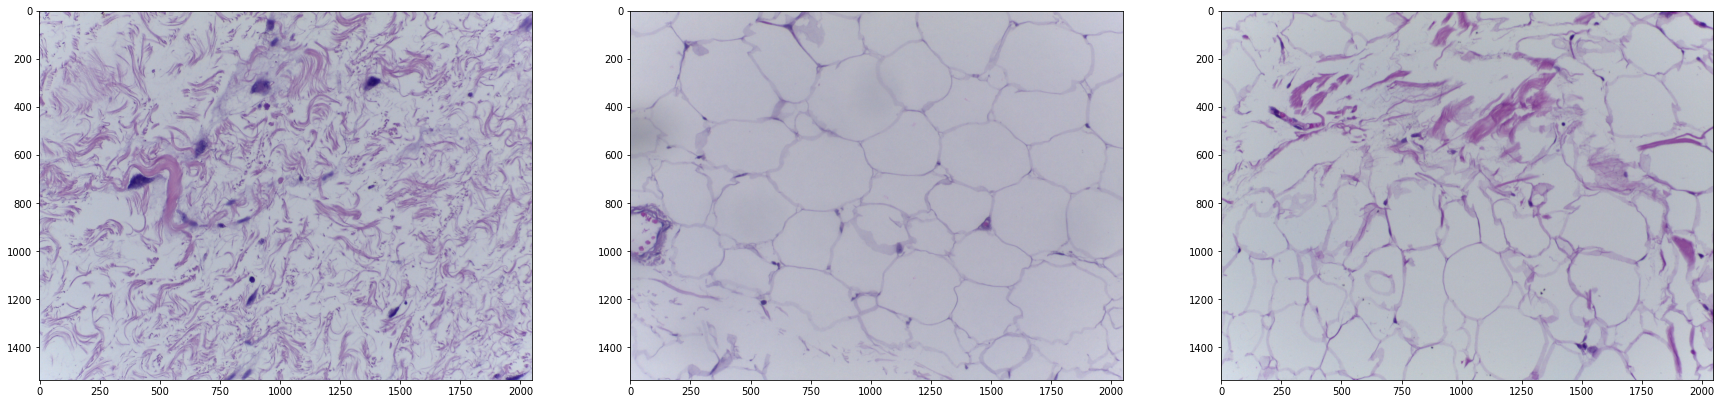

In [8]:
bad_img_pth = [os.path.join(src_folder,"Benign","b067.tif"),os.path.join(src_folder,"Normal","n026.tif"),os.path.join(src_folder,"Normal","n045.tif")]
bad_images = [Image.open(pth) for pth in bad_img_pth]

f,ax = plt.subplots(1,len(bad_images),figsize=(30,30*len(bad_images)))
for i in range(len(bad_images)):
    ax[i].imshow(bad_images[i])
plt.show()

# Results

Data(edge_index=[2, 10508], x=[1504, 3072], edge_attr=[10508, 1], pos=[1504, 2])
(1408, 1920)


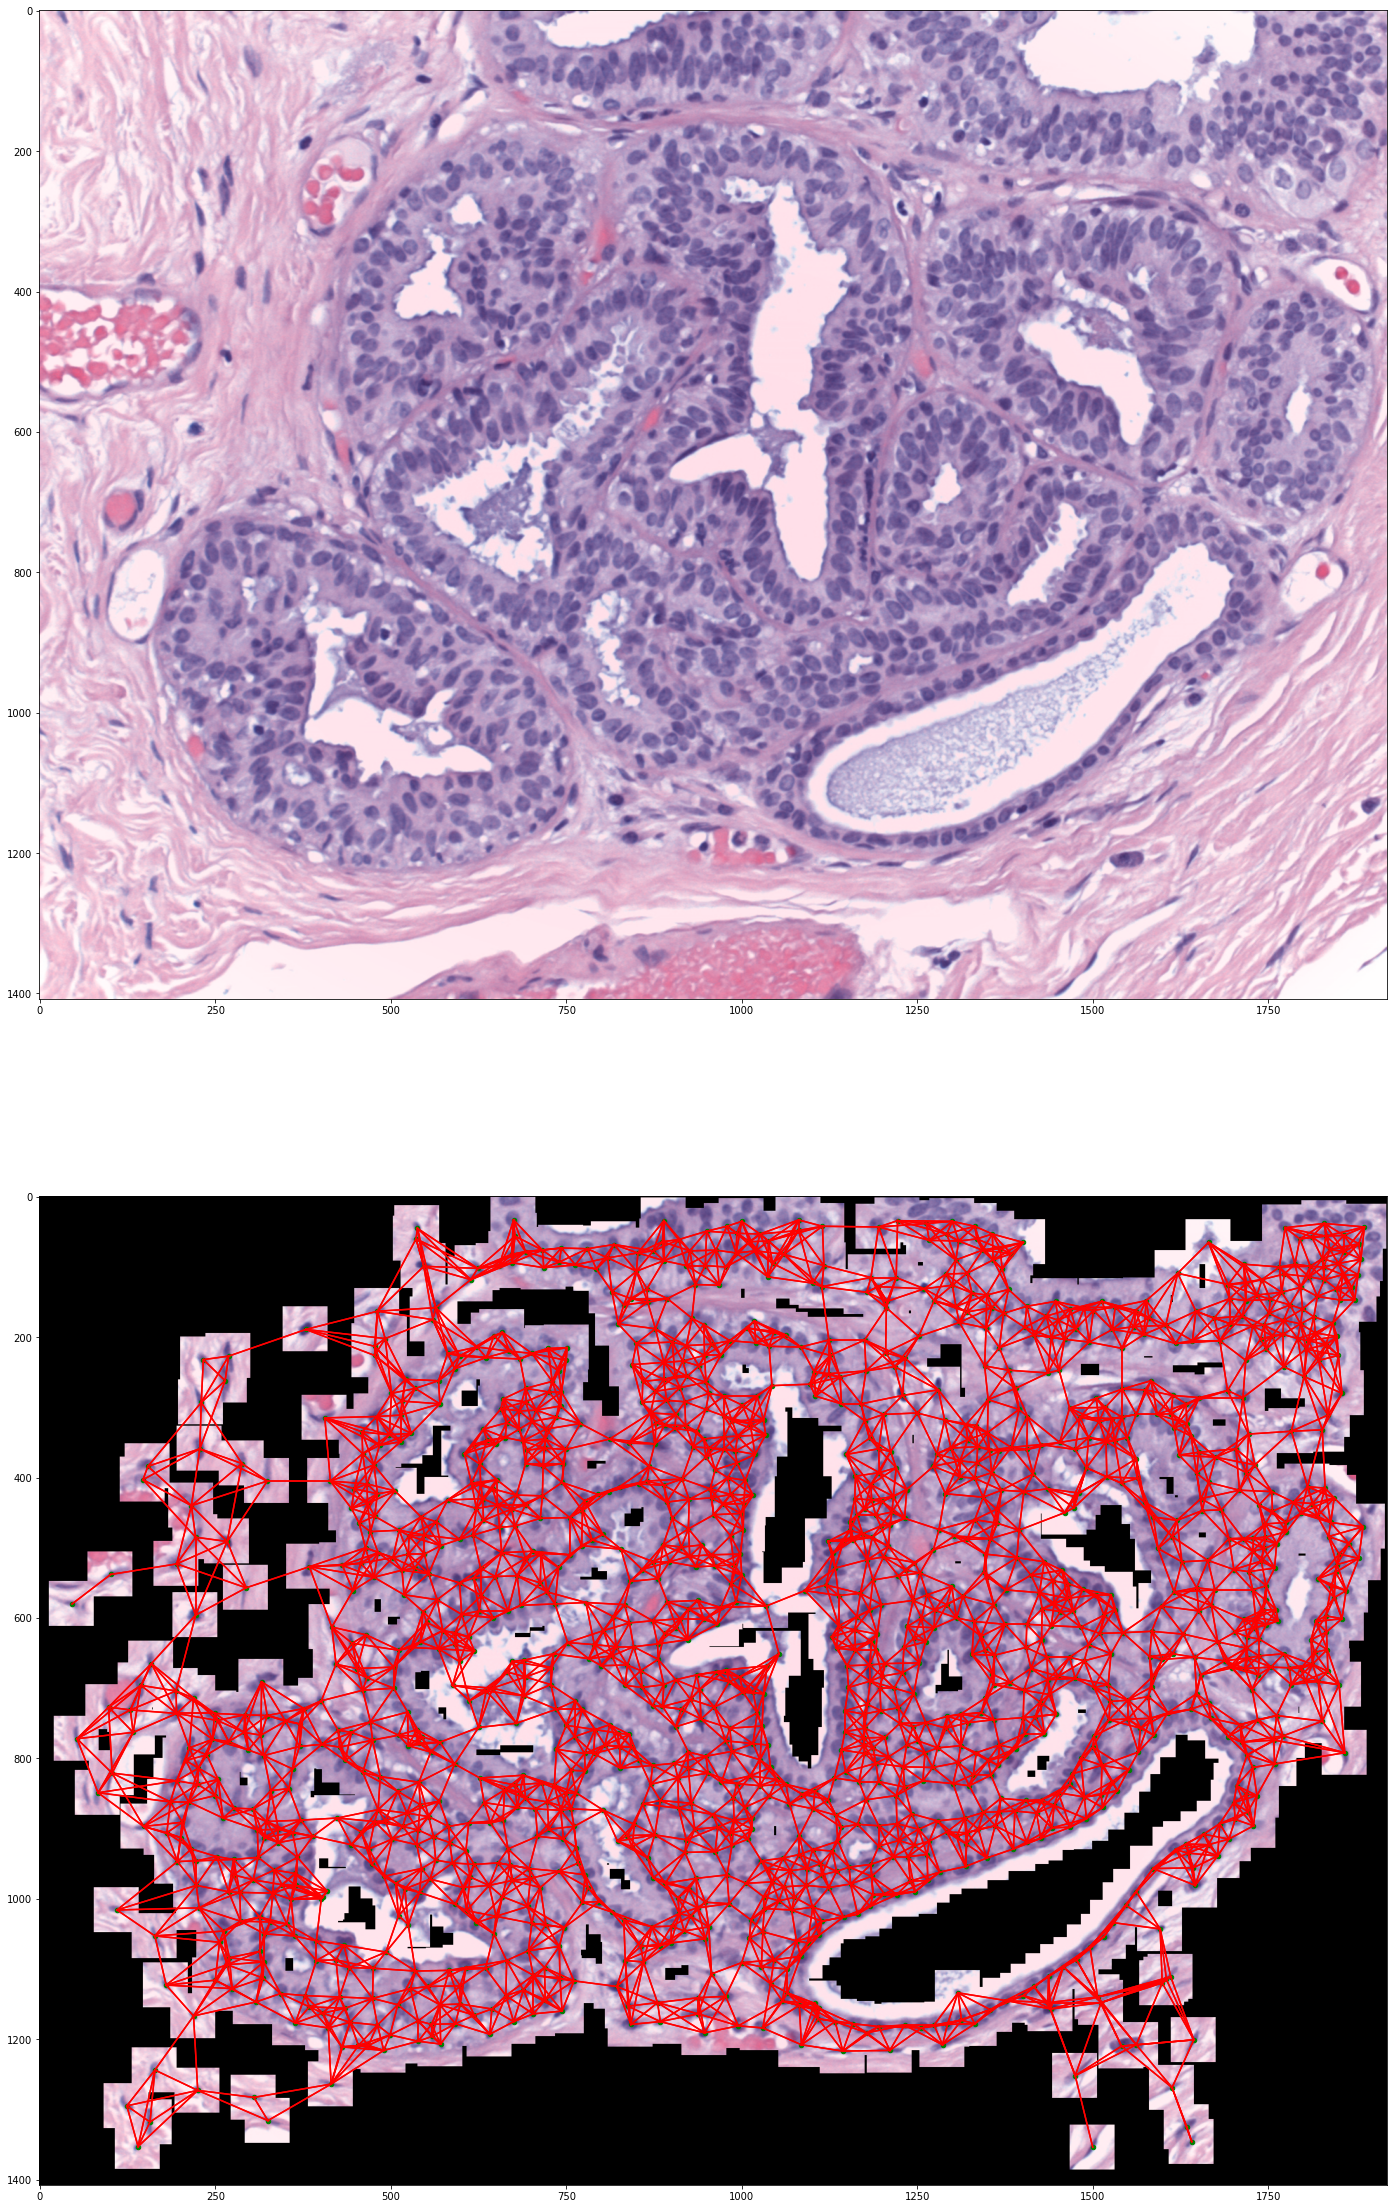

In [9]:
from src.utilities.img_utilities import tensor_to_numpy
from src.vizualizations.image_viz import plot_images
from torchvision.transforms.functional import resize
from src.transforms.graph_construction.graph_extractor import extract_graph

def visualize_graph(graph,ins_seg,upsample=2):

    dimensions = tuple(ins_seg['image'].shape[1:])
    print(dimensions)
    final = torch.zeros(3,*dimensions)
    for i,cell in enumerate(graph.x):
        pixels = len(cell)
        n_shape = (3,int((pixels//3)**0.5),int((pixels//3)**0.5))
        img = cell.unflatten(0,n_shape)
        img_n_dim = tuple(torch.as_tensor(img.shape[1:])*upsample)
        img = resize(img,size=img_n_dim)
        wd,ht = tuple(img.shape[1:])
        x,y = tuple(graph.pos[i])
        row,col = int(y.item()),int(x.item())
        
        final[:,row-ht//2:row+ht//2,col-wd//2:col+wd//2] = 1
    
    f,ax = plt.subplots(2,1,figsize=(50,40))
    ax[0].imshow(tensor_to_numpy(ins_seg['original_image']))
    ax[1].imshow(tensor_to_numpy(final*ins_seg['original_image']))
    for edge in graph.edge_index.t():
        a,b = graph.pos[edge[0]],graph.pos[edge[1]]
        ax[1].plot([a[0],b[0]],[a[1],b[1]],c="r")
    ax[1].scatter(graph.pos[:,0],graph.pos[:,1],c="g",s=20)
    plt.show()


ins_seg = torch.load(os.path.join(prc_folder,"b002.pt"))
graph = extract_graph(ins_seg['image'],ins_seg['instance_mask'],dmin=120,k=6,window_size=64,downsample=2,min_nodes=10)
print(graph)
visualize_graph(graph,ins_seg)

# Decisions

Looking at the graphs, I notice that most contain one large, fully connected island, and then some small islands with a couple of nodes. I do not think these small islands are very informative, so I will remove these by altering the graph extraction algorithm

# GNN

In [10]:
#from src.model.trainers.gnn_trainer import GNNTrainer
#import json
#
#args = json.load(open(os.path.join(parent,"experiments", "args", "default.json")))
#
#GNNTrainer(args).train()